In [6]:
cd C:\Users\PERT\Downloads\ML\Linear reg

C:\Users\PERT\Downloads\ML\Linear reg


In [26]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('Summary of Weather.csv')

C:\Users\PERT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [11]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [22]:
print('Months')
print(df['MO'].value_counts())
print('Years')
print(df['YR'].value_counts())

Months
12    11043
8     10547
10    10501
11    10408
7     10235
9     10122
5     10098
6      9837
4      9507
3      9447
1      8939
2      8356
Name: MO, dtype: int64
Years
44    40527
45    38210
43    25730
42     9825
41     2983
40     1765
Name: YR, dtype: int64


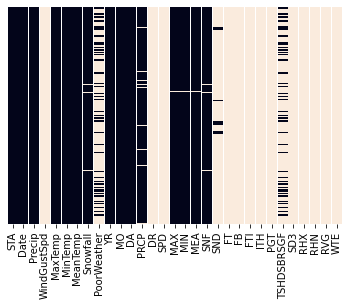

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Now, let's focus on using Minimum and Maximun Temperature.
We will check if there is a relationship between the two.

In [28]:
df = df[['MAX', 'MIN']]

visualize our data

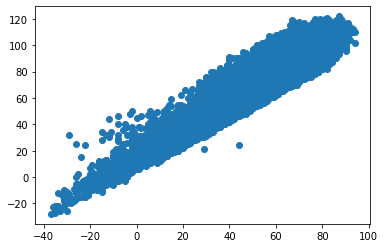

In [29]:
plt.scatter(df['MIN'],df["MAX"])

Lets determine outliers

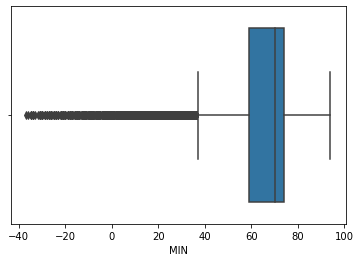

In [30]:
sns.boxplot(data=df,x='MIN')

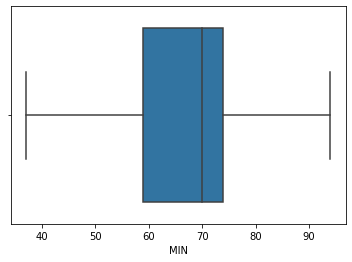

In [32]:
sns.boxplot(data=df,x='MIN',showfliers=False)

For the minimum temp the range without the outliers would be: 40 - 90

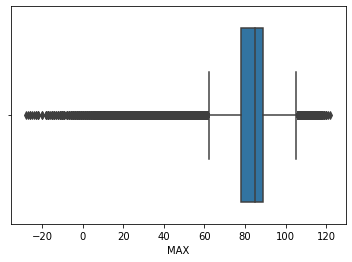

In [33]:
sns.boxplot(data=df,x='MAX')

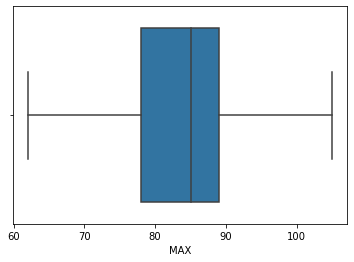

In [34]:
sns.boxplot(data=df,x='MAX',showfliers=False)

For the MAX let's limit the range into 60 - 120

In [88]:
df.drop(df[(df['MIN'] < 40)].index, inplace = True)
df.drop(df[(df['MIN'] > 90)].index, inplace = True)

In [89]:
df.drop(df[(df['MAX'] < 60)].index, inplace = True)
df.drop(df[(df['MAX'] > 120)].index, inplace = True)

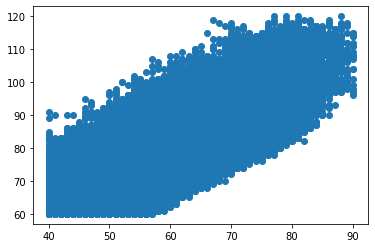

In [90]:
plt.scatter(df['MIN'],df["MAX"])

Let's perform a simple liner regression

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model = LinearRegression(fit_intercept=True)

In [93]:
print(pd.DataFrame(df).head())

    MAX   MIN
0  78.0  72.0
1  84.0  71.0
2  79.0  72.0
3  80.0  72.0
4  80.0  71.0


In [94]:
df.shape

(106540, 2)

In [95]:
df = df.dropna()

In [96]:
df.shape

(106540, 2)

In [97]:
x = df['MIN'].values.reshape(106540,-1)
y = df['MAX']



In [98]:
model.fit(x,y) #fit the model


LinearRegression()

Now that we have a model let's predict what will be the maximum tempreture today if the min temperature recorded is 51.5 degrees F

In [78]:
model.predict([[51.5]]) #pass 1 sample with 1 feature

array([69.54464971])

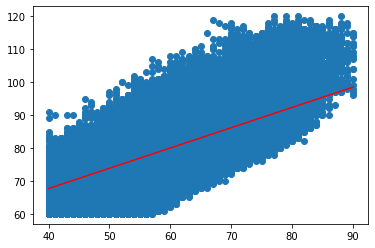

In [100]:
#test the model by genrating random numbers

xnew = np.linspace(40,90,100000)
ypred = model.predict(xnew.reshape(100000,-1))

plt.scatter(x,y)
plt.plot(xnew,ypred,color='red')

In [99]:

print('Model slope: ',model.coef_[0])
print('Model intercept: ',model.intercept_)

Model slope:  0.6154504492452505
Model intercept:  43.08403936331141


In [103]:
#evaluate model

# Rsquared and MAE

from sklearn.metrics import r2_score,mean_absolute_error

y_actual = 0.6155 * xnew + 43.0840
print('r2: ',r2_score(y_actual,ypred))
print('MAE',mean_absolute_error(y_actual,ypred))



r2:  0.9999998652791882
MAE 0.0031814357473121104


suppose that for today, the coolest temperature recorded so far is 86 deg F, what would be the maximum temperature possible?

In [104]:
model.predict([[86]])

array([96.012778])

That could go as hot as 96 degrees. Bring an umbrella, that's pretty hot.